In [ ]:
import sys
proj_dir = "C:\\Users\\coupang\\PycharmProjects\\auto_invest"
sys.path.append(proj_dir)
from src.cybos_talker import CybosTalker
ct = CybosTalker()

In [6]:
# Testing performance across multiple stocks
import random as rnd
global_stocks = ct.get_domestic_stock_list()
stocks = rnd.sample(global_stocks.keys(), 2)
print(stocks)

['현대에이치씨엔', '한화케미칼']


In [8]:
from datetime import datetime, timedelta
stock_name = '한화케미칼'
trainStart = (datetime.today() - timedelta(weeks=104)).strftime('%Y%m%d')
testEnd = (datetime.today() - timedelta(days=1)).strftime('%Y%m%d')
data = ct.get_training_set_dataframe(global_stocks[stock_name], 'range'
                                     , trainStart
                                     , testEnd)
data.describe()

KeyError: '날짜'

In [ ]:
import pandas as pd
drop_list = [c for c in data.columns.values if c != 'Date' and data[c].agg('sum') == 0]
data.drop(drop_list, axis=1, inplace=True, errors='ignore')

In [ ]:
data['today_price_delta'] = (data['Close'] - data['Open']) / data['Open'] * 100
first_day_sentinel = pd.Series([0], index= [len(today_price_delta)])

next_day_price_delta = today_price_delta[1:len(today_price_delta)]
next_day_price_delta.reindex(index=range(0, len(next_day_price_delta)))
next_day_price_delta.head(10)

next_day_price_delta = next_day_price_delta.append(first_day_sentinel)
data['next_day_price_delta'] = next_day_price_delta * 100
data[['Open', 'Close', 'today_price_delta', 'next_day_price_delta']].tail(10)
# data['exchange_portion'] = data['거래량'] / data['상장주식수'] * 100
# data['next_day_price_delta'] = next_day_price_delta * 100
# data.head(10)
### DONE WITH DATA MASSAGING ###

In [51]:
# feature extraction
from sklearn.feature_selection import SelectKBest, f_classif

# test = SelectKBest(score_func=chi2, k=4)
indicator_test = data.drop(['index', 'Date'], axis=1, inplace=False)
"""   ASSERT NO INFINITE & NaN VALUES   """
assert np.isfinite(indicator_test).all().all()
assert not np.isnan(indicator_test).any().any()

C:\Users\coupang\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [10 12 16 17] are constant.
  UserWarning)
C:\Users\coupang\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\coupang\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\coupang\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


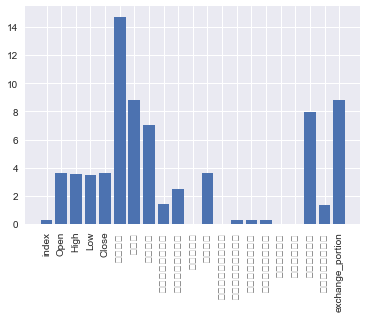

In [52]:
selector = SelectKBest(f_classif, k=5)
predictors = [c for c in indicator_test.columns.values if  c != "next_day_price_delta"]
selector.fit(indicator_test[predictors], indicator_test["next_day_price_delta"])
# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()
# Perform feature selection
# selector = SelectKBest(f_classif, k=5)
# selector.fit(titanic[predictors], titanic["Survived"])

# fit = test.fit(X, Y)

In [8]:
print(data.columns.values)

['index' 'Date' 'Open' 'High' 'Low' 'Close' '전일대비' '거래량' '거래대금' '누적체결매도수량'
 '누적체결매수수량' '상장주식수' '시가총액' '외국인주문한도수량' '외국인주문가능수량' '외국인현보유수량' '외국인현보유비율'
 '수정주가일자' '수정주가비율' '기관순매수량' '기관누적순매수량' 'exchange_portion'
 'next_day_price_delta']


In [7]:
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

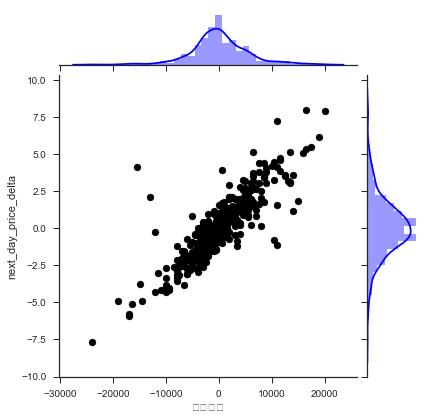

In [54]:
# grid = sns.FacetGrid(train_df, col='Embarked')
sns.set(style="ticks")
target_col = 'next_day_price_delta'
df = data[[target_col, '전일대비']]

# Show the results of a linear regression within each dataset
# Set up a grid to plot survival probability against several variables
# Show the results of a linear regression within each dataset
# mybins=np.logspace(0,np.log(100),100)
g = sns.JointGrid(x=df['전일대비']
                  , y = df.next_day_price_delta
                  #,xlim=[0, 2]
                  )
g.plot_marginals(sns.distplot, hist=True, kde=True, color='blue')
g.plot_joint(plt.scatter, color='black', edgecolor='black')

In [56]:
# Linear Regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
test_set = df[['전일대비', 'next_day_price_delta']]
test_set.head(10)
# model = model.fit(data['전일대비'], data.next_day_price_delta)

,전일대비,next_day_price_delta
0,-4000.0,0.000000
1,4500.0,1.046025
2,-7500.0,-2.500000
3,-3500.0,-0.646552
4,-1500.0,-0.434783
5,-1500.0,0.220264
6,3000.0,0.875274
7,6000.0,2.603037
8,-1500.0,0.213220
9,-10000.0,-3.846154
